In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os

In [5]:
#Task-1
df=pd.read_csv("Retail_Transactions_Dataset (1).csv")
print(df.head(5))
df.info()

   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1 

In [7]:
#convert 'date' column (from object) to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [9]:
#extract year, month, day of week
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['DayOfWeek']=df['Date'].dt.day_name()

print("\nDataFrame after Data Preprocessing: \n")
print(df[['Date','Year','Month','DayOfWeek']].head(10))


DataFrame after Data Preprocessing: 

                 Date  Year  Month  DayOfWeek
0 2022-01-21 06:27:29  2022      1     Friday
1 2023-03-01 13:01:21  2023      3  Wednesday
2 2024-03-21 15:37:04  2024      3   Thursday
3 2020-10-31 09:59:47  2020     10   Saturday
4 2020-12-10 00:59:59  2020     12   Thursday
5 2021-10-07 12:37:26  2021     10   Thursday
6 2023-01-08 10:40:03  2023      1     Sunday
7 2020-09-03 12:39:59  2020      9   Thursday
8 2021-04-05 06:32:18  2021      4     Monday
9 2021-07-08 10:08:59  2021      7   Thursday


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Transaction_ID     1000000 non-null  int64         
 1   Date               1000000 non-null  datetime64[ns]
 2   Customer_Name      1000000 non-null  object        
 3   Product            1000000 non-null  object        
 4   Total_Items        1000000 non-null  int64         
 5   Total_Cost         1000000 non-null  float64       
 6   Payment_Method     1000000 non-null  object        
 7   City               1000000 non-null  object        
 8   Store_Type         1000000 non-null  object        
 9   Discount_Applied   1000000 non-null  bool          
 10  Customer_Category  1000000 non-null  object        
 11  Season             1000000 non-null  object        
 12  Promotion          666057 non-null   object        
 13  Year               1000000 n

In [13]:
df.head(60)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,DayOfWeek
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN,2022,1,Friday
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),2023,3,Wednesday
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN,2024,3,Thursday
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN,2020,10,Saturday
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020,12,Thursday
5,1000000005,2021-10-07 12:37:26,Joshua Frazier,"['Toothpaste', 'Chicken']",3,72.24,Cash,Houston,Supermarket,True,Retiree,Spring,Discount on Selected Items,2021,10,Thursday
6,1000000006,2023-01-08 10:40:03,Victoria Garrett,"['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...",4,5.28,Cash,Boston,Specialty Store,False,Student,Summer,Discount on Selected Items,2023,1,Sunday
7,1000000007,2020-09-03 12:39:59,Sydney Waller,"['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...",5,21.77,Debit Card,Chicago,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020,9,Thursday
8,1000000008,2021-04-05 06:32:18,Kimberly Morgan,['Insect Repellent'],4,55.25,Mobile Payment,Los Angeles,Warehouse Club,False,Homemaker,Fall,NaN,2021,4,Monday
9,1000000009,2021-07-08 10:08:59,Lori Conway,"['Soap', 'Baby Wipes', 'Soda']",7,31.21,Mobile Payment,Boston,Convenience Store,True,Young Adult,Winter,NaN,2021,7,Thursday


In [15]:
##clean and preprocess data
#check for missing values
print("\nChecking for missing values: \n")
print(df.isnull().sum())


Checking for missing values: 

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
Year                      0
Month                     0
DayOfWeek                 0
dtype: int64


#### Task-2:
##### How many total transactions are there?
##### How many unique customers are in the dataset?
##### what are the top 5 most common products sold across all transactions?
##### Which cities have the highest number of transactions?

In [18]:
#Total transactions
total_transactions=df['Transaction_ID']
print(f'Total Transaction: {total_transactions}')

Total Transaction: 0         1000000000
1         1000000001
2         1000000002
3         1000000003
4         1000000004
             ...    
999995    1000999995
999996    1000999996
999997    1000999997
999998    1000999998
999999    1000999999
Name: Transaction_ID, Length: 1000000, dtype: int64


In [20]:
## Unique customers
unique_customers=df['Customer_Name'].nunique()
print(f'Unique Customers:{unique_customers}')

Unique Customers:329738


In [22]:
import ast
import pandas as pd
import numpy as np

def safe_eval(val):
    # Handle NaN values
    if val is None or (isinstance(val, float) and pd.isna(val)):
        return []
    
    # Handle lists directly
    if isinstance(val, list):
        return val
    
    # Handle numpy arrays
    if isinstance(val, np.ndarray):
        return val.tolist()
    
    # Handle strings
    if isinstance(val, str):
        val = val.strip()
        if val.startswith('[') and val.endswith(']'):
            try:
                return ast.literal_eval(val)
            except (ValueError, SyntaxError):
                return [val]
        else:
            return [val]
    
    # Fallback: convert to string
    return [str(val)]

# Apply safely
df['Product'] = df['Product'].apply(safe_eval)
top_products = df['Product'].explode().value_counts().head(5)
print(top_products)


Product
Toothpaste    73324
Ice Cream     37094
Soap          37076
Jam           36956
Orange        36928
Name: count, dtype: int64


In [30]:
##cities with the highest number of transactions
top_cities=df['City'].value_counts().head(60)
print('Cities with the Highest Number of Transactions: \n')
print(top_cities)

Cities with the Highest Number of Transactions: 

City
Boston           100566
Dallas           100559
Seattle          100167
Chicago          100059
Houston          100050
New York         100007
Los Angeles       99879
Miami             99839
San Francisco     99808
Atlanta           99066
Name: count, dtype: int64


#### Task 3: Customer Behavior Analysis
#### Which customer categories spend the most on average?
#### Do certain customer categories prefer specific payment methods?
#### What is the average number of items bought per transaction per store type?

In [33]:
## Customer categories spending
avg_spending=df.groupby('Customer_Category')['Total_Cost'].mean().sort_values(ascending=False)
print('\n Average Spending by Customer Category:')
print(avg_spending)


 Average Spending by Customer Category:
Customer_Category
Teenager          52.529091
Professional      52.525762
Student           52.487994
Homemaker         52.461417
Young Adult       52.448246
Retiree           52.435589
Middle-Aged       52.411318
Senior Citizen    52.342672
Name: Total_Cost, dtype: float64


In [37]:
##payment method preferences
payment_preferences=df.groupby('Customer_Category')['Payment_Method'].value_counts(normalize=True).unstack(fill_value=0)
print('\n Payment Method Preferences by Customer Category:')
print(payment_preferences)


 Payment Method Preferences by Customer Category:
Payment_Method         Cash  Credit Card  Debit Card  Mobile Payment
Customer_Category                                                   
Homemaker          0.250044     0.250466    0.249685        0.249805
Middle-Aged        0.249350     0.249117    0.250313        0.251220
Professional       0.250668     0.250307    0.249641        0.249384
Retiree            0.250008     0.251119    0.248265        0.250608
Senior Citizen     0.250564     0.250428    0.250388        0.248619
Student            0.250773     0.248778    0.250613        0.249836
Teenager           0.248989     0.251095    0.249938        0.249978
Young Adult        0.251451     0.248553    0.251756        0.248240


In [39]:
## average items bought per transaction per store type
avg_items_per_store=df.groupby('Store_Type')['Total_Items'].mean().sort_values(ascending=False)
print("Average Number of Items Bought per Transaction per store type:")
print(avg_items_per_store)

Average Number of Items Bought per Transaction per store type:
Store_Type
Specialty Store      5.508395
Convenience Store    5.505574
Pharmacy             5.498182
Department Store     5.495547
Supermarket          5.485767
Warehouse Club       5.482233
Name: Total_Items, dtype: float64


#### Task 4: Promotion & Discount Impact
#### What is the average cost of transactions where a discount was applied vs not applied?
#### Compare the average number of items purchased for different promotion types.
#### Which promotion type seems to be most effective in terms of increasing total cost?

In [32]:
avg_cost_discount=df.groupby('Discount_Applied')['Total_Cost'].mean()
print('Average Cost of Transactions with and without Discounts:')
print(avg_cost_discount)

Average Cost of Transactions with and without Discounts:
Discount_Applied
False    52.423512
True     52.486915
Name: Total_Cost, dtype: float64


In [44]:
##Average items purchased for different promotion types
avg_items_promotion=df.groupby('Promotion')['Total_Items'].mean().sort_values(ascending=False)
print('Average Items purchased for different promotion types:')
print(avg_items_promotion)

Average Items purchased for different promotion types:
Promotion
Discount on Selected Items    5.501248
BOGO (Buy One Get One)        5.494351
Name: Total_Items, dtype: float64


In [46]:
##effectiveness of promotion types
promotion_effectiveness=df.groupby('Promotion')['Total_Cost'].sum().sort_values(ascending=False)
print('Total revenue by promotion type:')
print(promotion_effectiveness)

Total revenue by promotion type:
Promotion
Discount on Selected Items    17462227.94
BOGO (Buy One Get One)        17438953.65
Name: Total_Cost, dtype: float64


#### Task 5: Seasonality Trends
#### Which season has the highest total revenue?
#### Are there seasonal preferences for certain store types or product categories?
#### Create a plot showing average spending per season.

In [49]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return'Unknown'
df['Season']=df['Month'].apply(get_season)

In [60]:
seasonal_revenue=df.groupby('Season')['Total_Cost'].sum().sort_values(ascending=False)
print("Total Revenue by Season:")
print(seasonal_revenue)

Total Revenue by Season:
Season
Spring    14652782.73
Winter    13778914.75
Summer    12077762.19
Fall      11945760.73
Name: Total_Cost, dtype: float64


In [62]:
seasonal_preferences=df.groupby(['Season','Store_Type'],observed=True)['Total_Cost'].sum().unstack(fill_value=0)
print('Seasonal Preferences for Store Types:')
print(seasonal_preferences)

Seasonal Preferences for Store Types:
Store_Type  Convenience Store  Department Store    Pharmacy  Specialty Store  \
Season                                                                         
Fall               1987200.76        1986928.25  1990334.12       1984214.54   
Spring             2448609.02        2432843.96  2451323.08       2441711.02   
Summer             2009498.09        2013509.03  2026540.49       1985213.90   
Winter             2286593.49        2298274.33  2298481.32       2290460.76   

Store_Type  Supermarket  Warehouse Club  
Season                                   
Fall         1992929.03      2004154.03  
Spring       2439114.39      2439181.26  
Summer       2017464.93      2025535.75  
Winter       2313946.86      2291157.99  


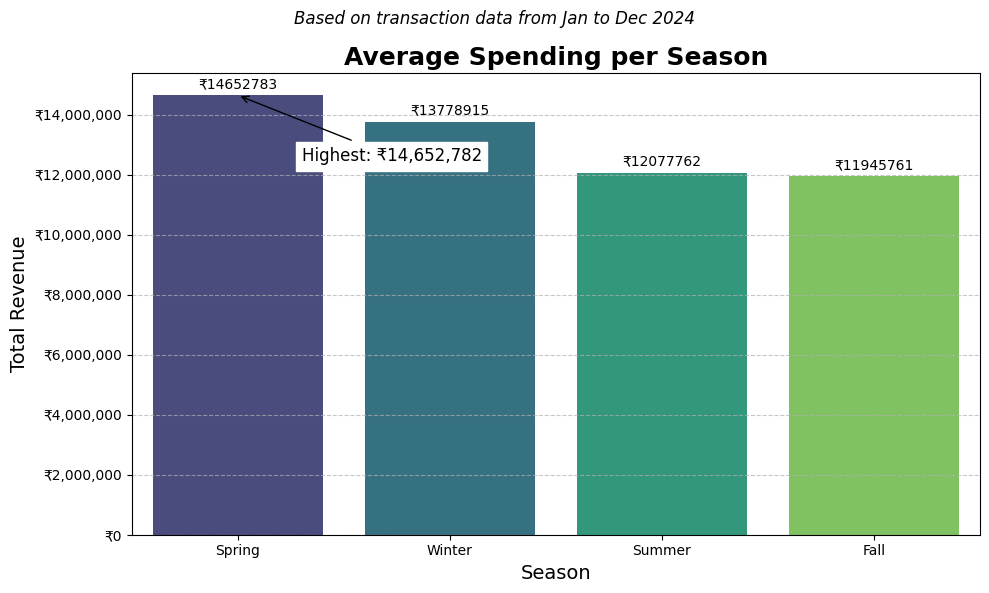

In [86]:
OUTPUT_DIR='plots'
os.makedirs(OUTPUT_DIR, exist_ok=True)

plt.figure(figsize=(10,6))
ax=sns.barplot(x=seasonal_revenue.index,y=seasonal_revenue.values,hue=seasonal_revenue.index,palette='viridis',legend=False)
plt.title('Average Spending per Season', fontsize=18, weight='bold')
plt.suptitle('Based on transaction data from Jan to Dec 2024', fontsize=12, style='italic')  
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Revenue',fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'₹{int(x):,}'))  # Comma formatting
# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)
# Annotate highest spending season

max_idx=seasonal_revenue.values.argmax()
max_season=seasonal_revenue.index[max_idx]
max_value=seasonal_revenue.values[max_idx]
ax.annotate(f'Highest: ₹{int(max_value):,}',xy=(max_idx, max_value), xytext=(max_idx + 0.3, max_value * 0.85),ha='left',arrowprops=dict(arrowstyle='->', color='black'),fontsize=12,backgroundcolor='white')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR,'total_revenue_per_season.png'))
plt.show()

#### Task 6: Visualization Dashboard
#### Bar plot of number of transactions per city
#### Pie chart showing distribution of payment methods
#### Line chart of monthly revenue trends (grouped by year if applicable)
#### Heatmap or stacked bar showing revenue by season and customer category

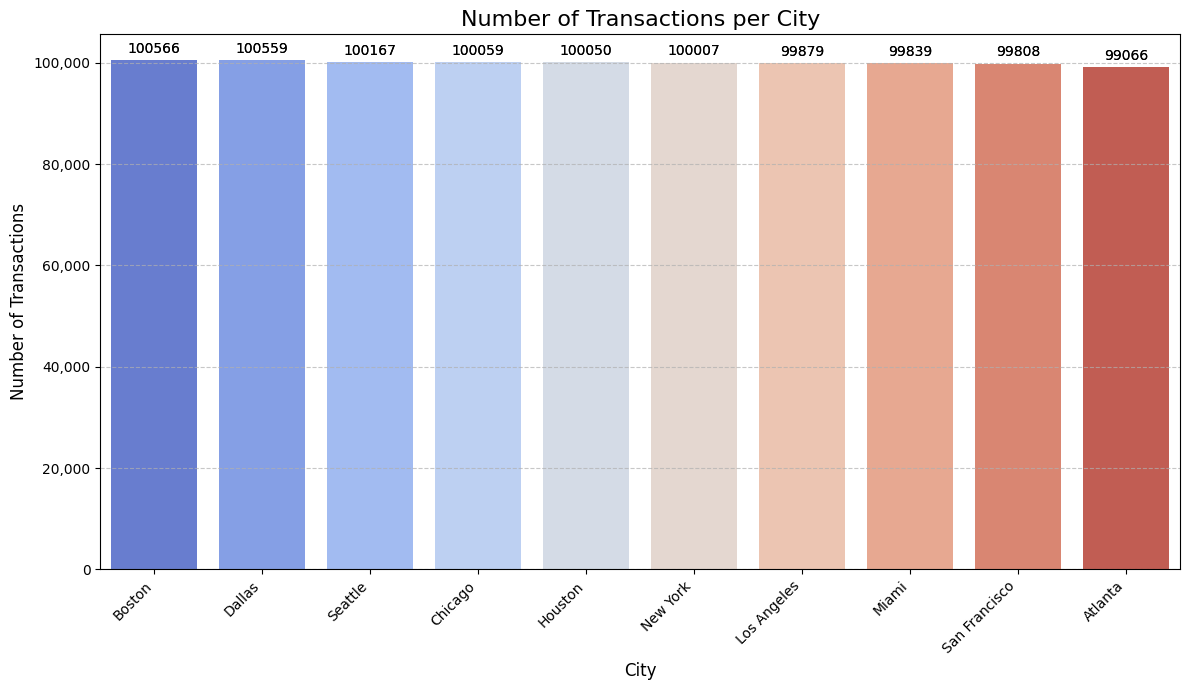

In [89]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,7))
sns.barplot(x=top_cities.index,y=top_cities.values,hue=top_cities.index,palette='coolwarm',legend=False)
ax = sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, palette='coolwarm', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Number of Transactions per City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'transactions_per_city_bar_plot.png'))
plt.show()

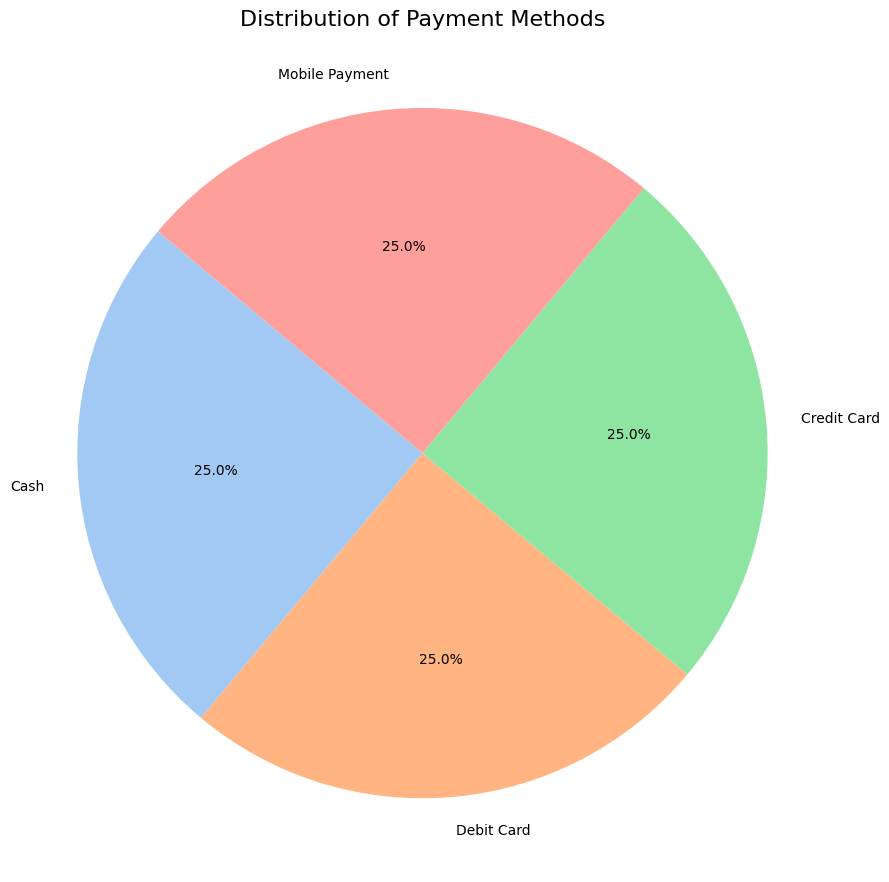

In [91]:
## Pie chart of payment method distribution
import os

OUTPUT_DIR = 'charts'  # or any folder name you prefer
os.makedirs(OUTPUT_DIR, exist_ok=True)
payment_distribution = df['Payment_Method'].value_counts()
plt.figure(figsize=(9, 9))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%',startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Payment Methods', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'payment_method_distribution_pie_chart.png'))
plt.show()

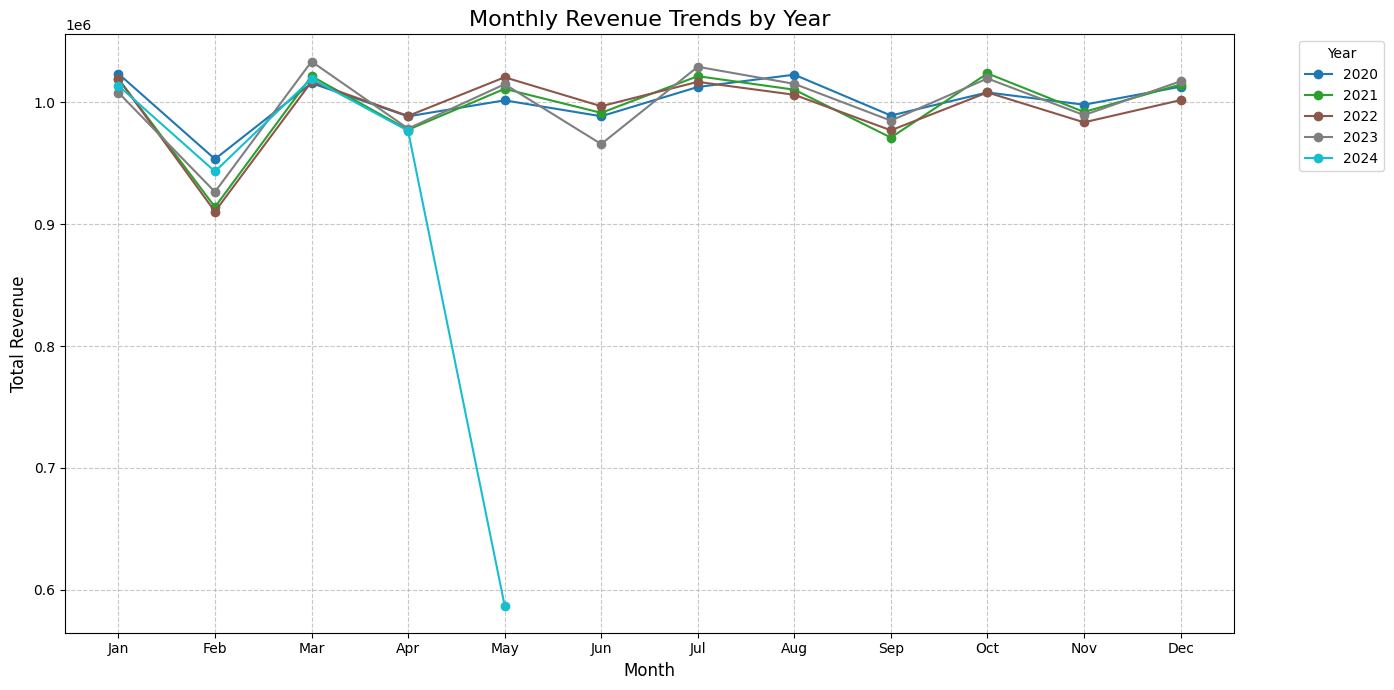

In [93]:
## Line chart of monthly revenue trends
monthly_revenue = df.groupby(['Year', 'Month'])['Total_Cost'].sum().unstack(level=0)
plt.figure(figsize=(14,7))
monthly_revenue.plot(kind='line',marker='o', ax=plt.gca(), colormap='tab10')
plt.title('Monthly Revenue Trends by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'monthly_revenue_trends_line_chart.png'))
plt.show()

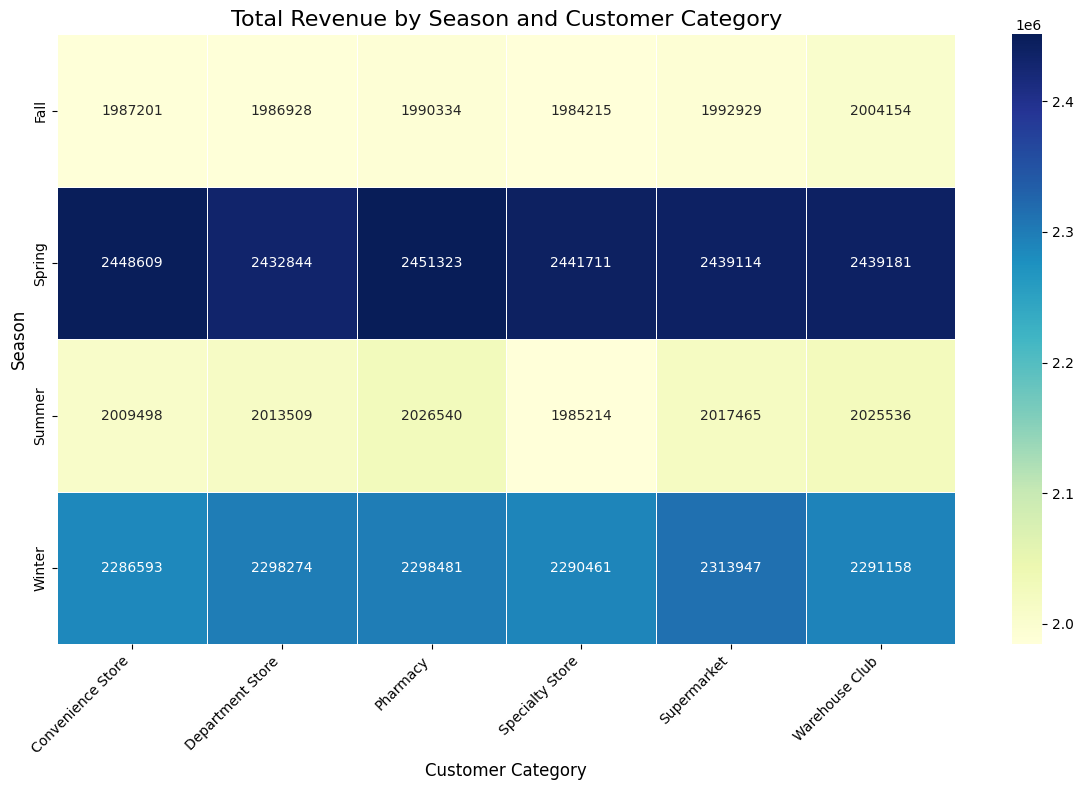

In [95]:

plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_preferences, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Total Revenue by Season and Customer Category', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Season', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'revenue_season_customer_category_heatmap.png'))
plt.show()

In [97]:
print(f"\nAnalysis complete. All plots saved to the '{OUTPUT_DIR}' directory.")



Analysis complete. All plots saved to the 'charts' directory.
